# Component Calculations

This notebook contains the calculations for the OTA design to help identify useful component values. The VCA is designed for unity gain when the input CV is 8V. See the Design section for derivation details.

## Linear Voltage to Current Conversion

The output current from the OTA should not exceed 1mA. The nominal limit for the input CV is 10V, so target a max output current of 0.5mA

In [14]:
unity_CV_in = 8
io_max_target = 0.5e-3
vcc_max = 12
R1 = 100e3      # fixed, input impedance
R2 = 68e3
R3 = 15e3
Rx = R1*R3/(R2 + R3)

i_abc_unity = unity_CV_in/Rx
print(f"1/Rx = {1/Rx*1e6}uA/V")
print(f"i_abc(unity) = {i_abc_unity*1e6:1.1f}uA")
print(f"io(max) = {vcc_max/Rx*1e6:1.1f}uA")
print(f"v1(min) = {-vcc_max*R2/R1:1.2f}V")

1/Rx = 55.333333333333336uA/V
i_abc(unity) = 442.7uA
io(max) = 664.0uA
v1(min) = -8.16V


## OTA

The OTA input uses a voltage divider to reduce the input voltage. The resulting relation between input and output voltage (from the Design section) is 

$$
v_{out} = 0.04224 i_{abc} v_{in} R
$$

Setting the target for $i_{abc}$ from the previous calculation (with 8V CV input), calculate $R$

In [16]:
Ra = 100e3
Rb = 220

R_fb = 1. / (19.2 * (Rb/Ra) * i_abc_unity)

print(f"R_fb(target) = {R_fb/1000:1.2f}kOhm")

Rf = 56e3

print(f"Gain at CV={unity_CV_in}V: {0.04224*i_abc_unity*Rf}")



R_fb(target) = 53.48kOhm
Gain at CV=8V: 1.04710144


## Measurement and Calibration Data

### Input

* Audio in: 8Vpp at 440Hz
* CV in: DC from 0 to 10V

### Output

* Measure Vpk-pk and mean on scope

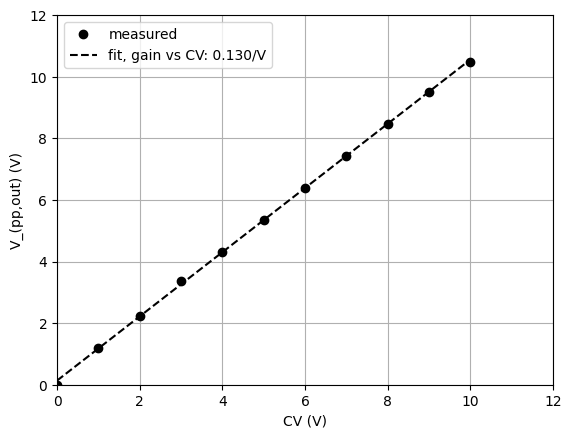

A = 0.130V_cv + 0.017
A(8) = 1.06


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# values recorded from two channels of one module on 2025-11-04

unity_gain_cv = 8
cv = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
vpp_i = 8
vpp_o = np.array([[0,1.20,2.24,3.36,4.32,5.36,6.40,7.44,8.48,9.52,10.48],
                  [0,1.28,2.40,3.44,4.48,5.52,6.64,7.60,8.72,9.68,10.72]])
gain_vv = vpp_o/vpp_i

a, b = np.polyfit(cv, vpp_o[0,:], 1)
vpp_fit = a* cv + b
plt.plot(cv, vpp_o[0,:], "ko")
plt.plot(cv, vpp_fit, "k--")
plt.grid(True)
plt.xlim([0,12])
plt.ylim([0,12])
plt.xlabel("CV (V)")
plt.ylabel("V_(pp,out) (V)")
plt.legend(["measured", f"fit, gain vs CV: {a/unity_gain_cv:1.3f}/V"])
plt.show()

print(f"A = {a/unity_gain_cv:1.3f}V_cv + {b/unity_gain_cv:1.3f}")
print(f"A(8) = {a + b/unity_gain_cv:1.2f}")


